In [1]:
#importing all the libariries that needed to run the prediction model
import pandas as pd
import numpy as np
#sklearn libary importing support vector regression
from sklearn.svm import SVR
#importing linear regression
from sklearn.linear_model import LinearRegression
#importing matplotlib to plot the graph
import matplotlib.pyplot as plt
#importing KneighborClassfier from sklearn
from sklearn.neighbors import KNeighborsClassifier
#Importing metrics for the accuracy
from sklearn.metrics import accuracy_score
from pandas_datareader import data as pdr

/Users/josh/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
pwd

'/Users/josh'

In [3]:
cd desktop/HealthcareData

/Users/josh/Desktop/HealthcareData


In [4]:
#predicting the company REGN by reading the csv. we taking a month of data to predict.
REGN = pd.read_csv('Regn2.csv')
REGN.head(22)


,Date,Open,High,Low,Close,Adj Close,Volume
0,11/4/19,313.049988,315.940002,310.739990,311.040009,311.040009,632800
1,11/5/19,323.359985,344.100006,322.109985,332.600006,332.600006,2345400
2,11/6/19,331.369995,333.279999,324.269989,324.489990,324.489990,1017500
3,11/7/19,329.179993,333.720001,325.619995,326.390015,326.390015,952300
4,11/8/19,327.519989,342.470001,327.029999,341.790009,341.790009,1106100
5,11/11/19,340.339996,344.989990,338.709991,344.279999,344.279999,611900
6,11/12/19,344.000000,349.940002,341.359985,348.410004,348.410004,905400
7,11/13/19,346.329987,349.630005,341.820007,348.299988,348.299988,1009400
8,11/14/19,349.799988,350.000000,337.029999,338.390015,338.390015,1029600
9,11/15/19,340.950012,349.859985,338.709991,344.869995,344.869995,912200


In [5]:
#we need to create the dataset of x and y which is the two data set we going to take to predict the model
#so we have to take the date and we taking the "Close" cloumn
dates = []
prices = []
REGN.tail(1)

,Date,Open,High,Low,Close,Adj Close,Volume
84,3/6/20,477.290009,496.98999,477.0,494.429993,494.429993,1130700


In [6]:
# retriving the data until the last row
REGN = REGN.head(len(REGN)-1)
REGN

,Date,Open,High,Low,Close,Adj Close,Volume
0,11/4/19,313.049988,315.940002,310.739990,311.040009,311.040009,632800
1,11/5/19,323.359985,344.100006,322.109985,332.600006,332.600006,2345400
2,11/6/19,331.369995,333.279999,324.269989,324.489990,324.489990,1017500
3,11/7/19,329.179993,333.720001,325.619995,326.390015,326.390015,952300
4,11/8/19,327.519989,342.470001,327.029999,341.790009,341.790009,1106100
...,...,...,...,...,...,...,...
79,2/28/20,422.369995,445.049988,418.220001,444.570007,444.570007,1594800
80,3/2/20,445.000000,465.510010,445.000000,464.750000,464.750000,1713100
81,3/3/20,454.720001,467.690002,448.109985,461.549988,461.549988,1210600
82,3/4/20,467.959991,494.559998,467.130005,493.480011,493.480011,1960700


In [7]:
REGN_dates = REGN.loc[:, 'Date']
#Getting  all of the rows from the Close Column
REGN_open = REGN.loc[:, 'Close']


In [8]:
#building  the independent data set for x
for date in REGN_dates:
 dates.append( [int(date.split('/')[2])])
  
#building the dependent data set for y
for Close_price in REGN_open:
  prices.append(float(Close_price))
#printing all the dates 
print(dates)

[[19], [19], [19], [19], [19], [19], [19], [19], [19], [19], [19], [19], [19], [19], [19], [19], [19], [19], [19], [19], [19], [19], [19], [19], [19], [19], [19], [19], [19], [19], [19], [19], [19], [19], [19], [19], [19], [19], [19], [19], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20]]


In [9]:
#prediction model to build the relationship between x and y to do a prediction
def predict_prices(dates, prices, x):
  
  #Creating the  Support Vector Regression model
  svr_lin = SVR(kernel='linear', C= 1e3)
  svr_poly= SVR(kernel='poly', C=1e3, degree=2)
  svr_rbf = SVR(kernel='rbf', C=1e3, gamma='auto')
  
  #TRAINING THE DATA SET TO GET THE MODEL OF PREDICTION 
  svr_lin.fit(dates,prices)
  svr_poly.fit(dates,prices)
  svr_rbf.fit(dates,prices)
  
  #creating rhe model of LR
  lin_reg = LinearRegression()
  #Trainning the model
  lin_reg.fit(dates,prices)
  
  #Plot the models on a graph to see which has the best fit
  plt.scatter(dates, prices, color='black', label='Data')
  plt.plot(dates, svr_rbf.predict(dates), color='red', label='SVR RBF')
  plt.plot(dates, svr_poly.predict(dates), color='blue', label='SVR Poly')
  plt.plot(dates, svr_lin.predict(dates), color='green', label='SVR Linear')
  plt.plot(dates, lin_reg.predict(dates), color='orange', label='Linear Reg')
  plt.xlabel('Days')
  plt.ylabel('Price')
  plt.title('SVR MODEL')
  plt.legend()
  plt.show()
  
  return svr_rbf.predict(x)[0], svr_lin.predict(x)[0],svr_poly.predict(x)[0],lin_reg.predict(x)[0]

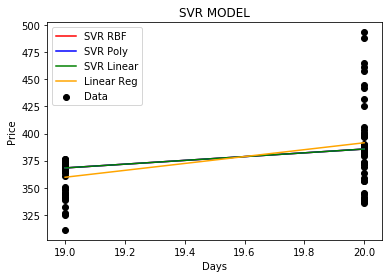

(376.95330160845674, 315.9499630002624, 321.3118734377658, 264.1900030363635)


In [10]:
#Predict the price of Regeneron Inc on day 
predicted_price = predict_prices(dates, prices, [[16]])
print(predicted_price)

Using KNN Algorithm

In [11]:
REGN

,Date,Open,High,Low,Close,Adj Close,Volume
0,11/4/19,313.049988,315.940002,310.739990,311.040009,311.040009,632800
1,11/5/19,323.359985,344.100006,322.109985,332.600006,332.600006,2345400
2,11/6/19,331.369995,333.279999,324.269989,324.489990,324.489990,1017500
3,11/7/19,329.179993,333.720001,325.619995,326.390015,326.390015,952300
4,11/8/19,327.519989,342.470001,327.029999,341.790009,341.790009,1106100
...,...,...,...,...,...,...,...
79,2/28/20,422.369995,445.049988,418.220001,444.570007,444.570007,1594800
80,3/2/20,445.000000,465.510010,445.000000,464.750000,464.750000,1713100
81,3/3/20,454.720001,467.690002,448.109985,461.549988,461.549988,1210600
82,3/4/20,467.959991,494.559998,467.130005,493.480011,493.480011,1960700


In [12]:
REGN['Open-Close'] = REGN.Open -REGN.Close
REGN['High-Low'] = REGN.High -REGN.Low
REGN = REGN.dropna()
X= REGN[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
0,2.009979,5.200012
1,-9.240021,21.990021
2,6.880005,9.010010
3,2.789978,8.100006
4,-14.270020,15.440002


In [21]:
Y= np.where(REGN['Close'].shift(-1)>REGN['Close'],1,-1)

In [28]:
split_percentage = 0.5
split = int(split_percentage*len(REGN))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[:split]
Y_test = Y[:split]

In [29]:
knn = KNeighborsClassifier(n_neighbors=12)

knn.fit(X_train, Y_train)

accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))

In [30]:
print(accuracy_train)
print(accuracy_test)


0.6428571428571429
0.6428571428571429
